# Face Mask Detection

In [2]:
import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
main_dir = r'C:\Users\MIHIR TAYSHETE\Coursera ML course\kaggle\input\covid-face-mask-detection-dataset\New Masks Dataset'
train_dir = os.path.join(main_dir,'Train')
test_dir = os.path.join(main_dir,'Test')
validation_dir = os.path.join(main_dir,'Validation')

train_mask_dir = os.path.join(train_dir,'Mask')
train_non_mask_dir = os.path.join(train_dir,'Non Mask')

In [5]:
train_mask_dir_names = os.listdir(train_mask_dir)
train_non_mask_dir_names = os.listdir(train_non_mask_dir)

print(train_mask_dir_names[:10])
print(train_non_mask_dir_names[:10])

['0003.jpg', '0006.jpg', '0018.jpg', '0019.jpg', '0022.jpg', '0027.jpg', '0029.jpg', '0037.jpg', '0040.jpg', '0042.jpg']
['0.jpg', '1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg']


In [6]:
import matplotlib.image as npimg
nrows=4
ncols=4
plt.figure(figsize=(12,12))

mask_pic = []

for i in train_mask_dir_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))

no_mask_pic = []

for i in train_non_mask_dir_names[0:8]:
  no_mask_pic.append(os.path.join(train_non_mask_dir,i))

<Figure size 864x864 with 0 Axes>

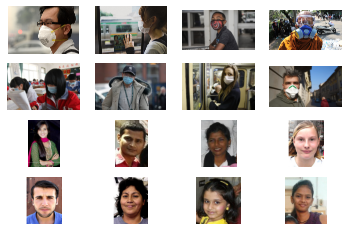

In [8]:
merged_list = mask_pic + no_mask_pic

for i in range(0,len(merged_list)):
  data = merged_list[i].split('/',0)[0]
  sp = plt.subplot(nrows,ncols,i+1)
  plt.axis('Off')
  image = npimg.imread(merged_list[i])
  plt.imshow(image,cmap='gray')
plt.show()

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   rotation_range=40,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_images_generator = train_datagen.flow_from_directory(train_dir,
                                                           target_size=(180,180),
                                                           batch_size=32,
                                                           class_mode='binary')

test_images_generator = test_datagen.flow_from_directory(test_dir,
                                                           target_size=(180,180),
                                                           batch_size=32,
                                                           class_mode='binary')

valid_images_generator = validation_datagen.flow_from_directory(validation_dir,
                                                           target_size=(180,180),
                                                           batch_size=32,
                                                           class_mode='binary')

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [9]:
train_images_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [10]:
train_images_generator.image_shape

(180, 180, 3)

***Building Convolutional neural network***

In [11]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(180,180,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 45, 45, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 129600)            0

In [12]:
model.compile(Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(train_images_generator,epochs=100,validation_data=valid_images_generator)

Epoch 1/100
19/19 [==============================] - 27s 1s/step - loss: 1.1515 - accuracy: 0.6200 - val_loss: 0.5389 - val_accuracy: 0.8203
Epoch 2/100
19/19 [==============================] - 19s 1s/step - loss: 0.3800 - accuracy: 0.8533 - val_loss: 0.4037 - val_accuracy: 0.8562
Epoch 3/100
19/19 [==============================] - 18s 974ms/step - loss: 0.3211 - accuracy: 0.8917 - val_loss: 0.2827 - val_accuracy: 0.8987
Epoch 4/100
19/19 [==============================] - 17s 887ms/step - loss: 0.3011 - accuracy: 0.8867 - val_loss: 0.2814 - val_accuracy: 0.8922
Epoch 5/100
19/19 [==============================] - 23s 1s/step - loss: 0.2552 - accuracy: 0.9067 - val_loss: 0.2003 - val_accuracy: 0.9281
Epoch 6/100
19/19 [==============================] - 21s 1s/step - loss: 0.2371 - accuracy: 0.9067 - val_loss: 0.2238 - val_accuracy: 0.9216
Epoch 7/100
19/19 [==============================] - 24s 1s/step - loss: 0.2407 - accuracy: 0.9100 - val_loss: 0.2566 - val_accuracy: 0.9020
Epoch 8

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'Epochs')

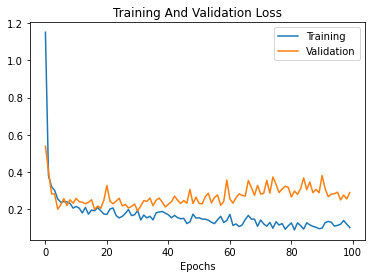

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title("Training And Validation Loss")
plt.xlabel("Epochs")

In [16]:
test_loss , test_acc = model.evaluate(test_images_generator)

print("Test Loss: {} Test Accuracy: {}".format(test_loss,test_acc))

4/4 [==============================] - 2s 419ms/step - loss: 0.1232 - accuracy: 0.9600
Test Loss: 0.12320563942193985 Test Accuracy: 0.9599999785423279


***As We See Our Model Is Not Overfitted.***

In [17]:
model.save('face_mask_detection.h5')

In [18]:
import matplotlib.image as mpimg
from keras.preprocessing import image

def test_image_mask_nomask(path):
    im = mpimg.imread(path)
    plt.imshow(im)
    
    img = image.load_img(path,target_size=(180,180))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    prediction = model.predict(img)
    if prediction == 0:
        
        print("Person Wearing A Mask")

    else:
        print("Person Not Wearing A Mask")

Person Wearing A Mask


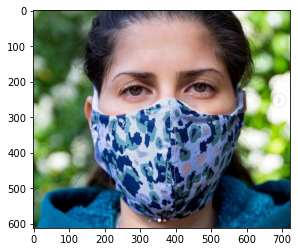

In [19]:
test_image_mask_nomask(r'C:\Users\MIHIR TAYSHETE\Coursera ML course\kaggle\input\covid-face-mask-detection-dataset\New Masks Dataset\Test\Mask/2265.png')

Person Not Wearing A Mask


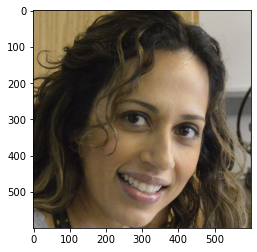

In [20]:
test_image_mask_nomask(r'C:\Users\MIHIR TAYSHETE\Coursera ML course\kaggle\input\covid-face-mask-detection-dataset\New Masks Dataset\Test\Non Mask/real_01050.jpg')